In [1]:
import re #regex split
from Module.mutili import *
plt.style.use('classic')

In [34]:
name = 'Moby-Dick'

encode = "UTF-8"
filename = name + '.txt'
big, syl, word, longest = info(filename, encode)
#--------------plot geometric_sequence
V, H = geometric_sequence(word, syl)
f, flu = Plot_f(1, V, H, big, longest, toler = 50, avg_N = 50)

read file successfully!
Successfully count word freqency!(Moby-Dick.txt)
Successfully count syl freqency!
Successfully build data frames!


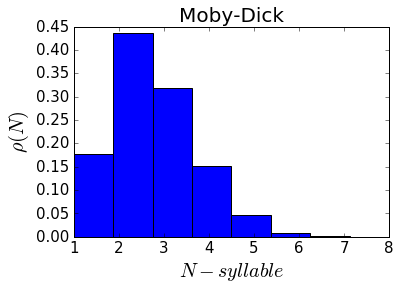

In [35]:
def N_syl_dist(big, longest, name, SP = 'T', FORMAT = 'png'):
    N_syl = big["N_syl"]
    fig, ax = plt.subplots()
    plt.hist(N_syl, bins = longest, density = True)
    
    plt.xlabel('$N-syllable$', size = 20)
    plt.ylabel('$\\rho(N)$', size = 20)
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15)
    #https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html
    ax.ticklabel_format(axis='x', style='sci',scilimits=(0,3))
    #https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
    plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
    plt.title(name, size = 20)
    if (SP == 'T') and (FORMAT == 'png' or 'pdf' or 'ps' or 'eps' or 'svg'):
        fig.savefig('N-syl of ' + name + '.' + FORMAT, dpi = 300, format = FORMAT)
    plt.show()

N_syl_dist(big, longest, name, SP = 'T', FORMAT = 'png')

In [33]:
def featuring(flu, big, longest):
    #use coordinate of RRD plot to get (protein, domain) on f1
    #Future version: find out data on other scaling curves
    lup = []
    for i in range(len(flu['f1'][0])):
        luptx = flu['f1'][0][i]
        lupty = flu['f1'][1][i]
        lup.append((luptx,lupty))

    feature_protein = []
    feature_domain = []
    for p in lup:
        protein = big.loc[big['wordRank'] == p[0]]
        for i in range(longest): # 0th_syl ~ (longest-1)_th_syl
            if protein.iloc[0][str(i) + "th_syl_rank"] == p[1]:
                protein_word = protein.iloc[0]['word']
                domain_ID = protein_word.split('-')[i]
                feature_protein.append(protein_word)
                feature_domain.append(domain_ID)
    return feature_protein, feature_domain

feature_protein, feature_domain = featuring(flu, big, longest)

In [34]:
def whole(big, longest):
    #get all points (protein, domain) in RRD plot
    whole_protein = []
    whole_domain = []
    for i in big['word']:
        whole_protein.append(i)
    for i in whole_protein:
        domain_ID = i.split('-')
        for j in domain_ID:
            whole_domain.append(j)
    return whole_protein, whole_domain

whole_protein, whole_domain = whole(big, longest)

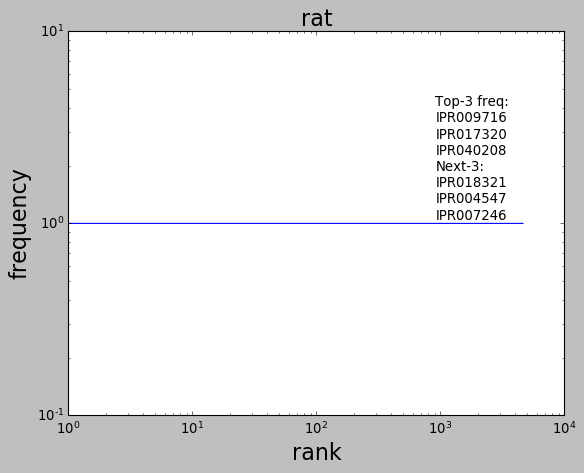

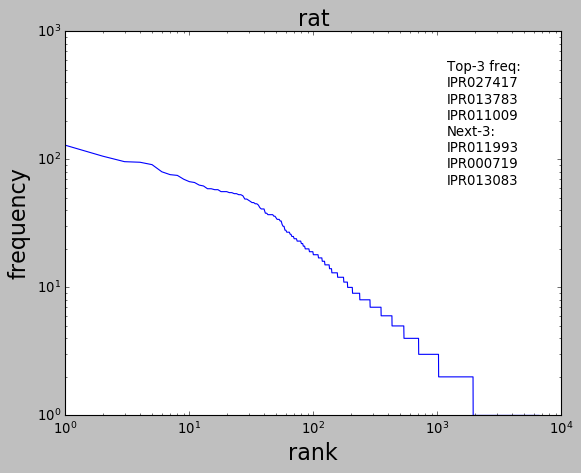

In [35]:
def domain_dist(domain):
    domain_freq = count_frequency(domain)
    
    pair = []
    for i in domain_freq:
        pair.append((i, domain_freq[i]))

    sorted_domain_freq = sorted(pair, key = lambda x: x[1], reverse = True)
        
    da = [i[1] for i in sorted_domain_freq]
    plt.plot(da)
    
    plt.xlabel('rank', size = 20)
    plt.ylabel('frequency', size = 20)
    plt.title(name, fontsize = 20)    
    xm, xM = plt.xlim()
    ym, yM = plt.ylim()
    #print top-5 most frequent domain_function
    top = [sorted_domain_freq[n][0] for n in range(6)]
    plt.text(xM**0.8, yM**0.8, 'Top-3 freq:\n%s\n%s\n%s\nNext-3:\n%s\n%s\n%s' %
             (top[0], top[1], top[2], top[3], top[4], top[5]))
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
domain_dist(feature_domain)
domain_dist(whole_domain)

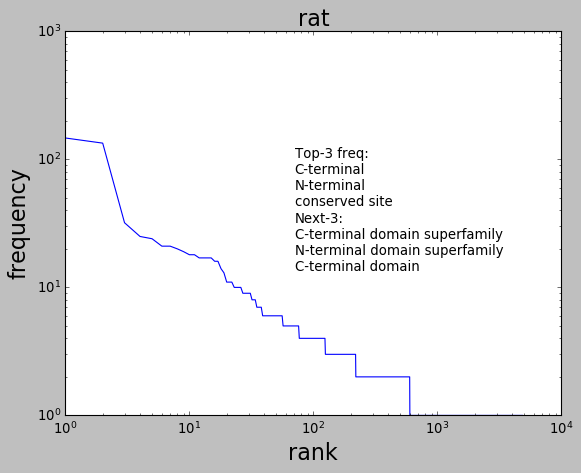

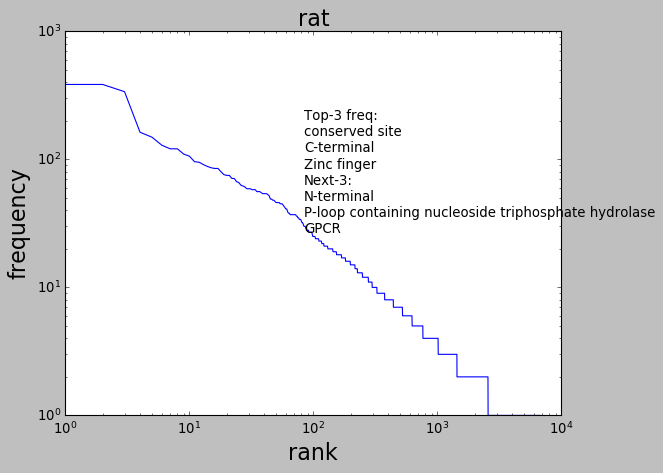

In [36]:
def domain_fun_dist(Ensembl_filename, domain):
    xl = pd.read_excel(Ensembl_filename)
    domain_function = []
    for i in domain:
        Gene_ID = xl.loc[xl['Interpro ID'] == i]
        domain_function.append(Gene_ID.iloc[0]['Interpro Description'])

    functions = []
    for i in domain_function:
        #segmentation notation including ","and ":"
        #https://www.geeksforgeeks.org/python-split-multiple-characters-from-string
        res = re.split(',\ |\:', i) #notice we split ", ", there is a space!
        for j in res:
            functions.append(j)
    function_freq = count_frequency(functions)
    
    pair = []
    for i in function_freq:
        pair.append((i, function_freq[i]))

    sorted_function_freq = sorted(pair, key = lambda x: x[1], reverse = True)
        
    da = [i[1] for i in sorted_function_freq]
    plt.plot(da)
    
    plt.xlabel('rank', size = 20)
    plt.ylabel('frequency', size = 20)
    plt.title(name, fontsize = 20)    
    xm, xM = plt.xlim()
    ym, yM = plt.ylim()
    #print top-5 most frequent domain_function
    top = [sorted_function_freq[n][0] for n in range(6)]
    plt.text(xM**0.5, yM**0.5, 'Top-3 freq:\n%s\n%s\n%s\nNext-3:\n%s\n%s\n%s' %
             (top[0], top[1], top[2], top[3], top[4], top[5]))
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
    

Ensembl_filename = 'mart_' + name + '.xls'
domain_fun_dist(Ensembl_filename, feature_domain)
domain_fun_dist(Ensembl_filename, whole_domain)